In [4]:
import pandas as pd #Traemos libreria pandas

url = "https://raw.githubusercontent.com/mevangelista-alvarado/datasets/refs/heads/main/spotify_songs.csv" # Enlaceraw al archivo CSV
df = pd.read_csv(url) #Descarga y convierten CVS a Dataframe para uso


In [5]:
df  # muestra las primeras y últimas filas del DataFrame

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [6]:
# Seleccionar características (features)
features = [
    'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'duration_ms',
]
X = df[features].values #Convierte a matriz

# Target numérico
y = df['popularity'].values


In [8]:
from sklearn.model_selection import train_test_split   # selecciona e importa datos
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)            # 80 % entrena, 20 % prueba

In [ ]:
from sklearn.preprocessing import StandardScaler  # importa el proceso de escalamiento
scaler = StandardScaler()       # crea objeto
X_train = scaler.fit_transform(X_train) # ajusta media/desv. con entrenamiento y lo transforma
X_test = scaler.transform(X_test)# aplica mismo ajuste a test

In [10]:
from tensorflow.keras.models import Sequential # importa el modelo de red neuronal
from tensorflow.keras.layers import Dense # importa las capas de neuronas

model = Sequential([   # crea la red capa por capa
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # primera capa: 64 neuronas con activación relu
    Dense(32, activation='relu'), # segunda capa: 32 neuronas con activación relu
    Dense(1, activation='linear')  # capa final: 1 neurona sin activación (salida numérica directa)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
from tensorflow.keras.optimizers import Adam   # importa el optimizador Adam
learning_rate = 0.001                         # Tasa de aprendizaje deseada
adam_optimizer = Adam(learning_rate=learning_rate)  # Optimiza con esa velocidad

In [13]:
model.compile(
    optimizer=adam_optimizer,   # Adam ajustado
    loss='mse',                 # minimiza error cuadrático medio
    metrics=['mae']             # muestra error absoluto medio
)

In [14]:
history = model.fit(
    X_train, y_train,        # datos de entrenamiento
    validation_split=0.2,    # aparta 20 % de X_entrenamiento para validar en cada época
    epochs=50,               # 50 vueltas completas al dataset
    batch_size=50            # actualiza pesos cada 50 muestras
)

Epoch 1/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 719.4902 - mae: 21.7160 - val_loss: 484.4327 - val_mae: 18.2157
Epoch 2/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 483.8683 - mae: 18.1802 - val_loss: 474.8545 - val_mae: 17.9264
Epoch 3/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 472.2038 - mae: 17.9252 - val_loss: 468.8798 - val_mae: 17.7752
Epoch 4/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 467.2437 - mae: 17.7583 - val_loss: 463.6798 - val_mae: 17.6112
Epoch 5/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 463.8791 - mae: 17.6938 - val_loss: 461.6524 - val_mae: 17.6014
Epoch 6/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 459.4120 - mae: 17.5801 - val_loss: 463.4877 - val_mae: 17.6583
Epoch 7/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 459.4650 - mae: 17.5717 - val_loss: 458.7848 - val_mae: 17.5589
Epoch 8/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 458.3318 - mae: 17.5433 - val_loss: 457.8504 - val_mae: 

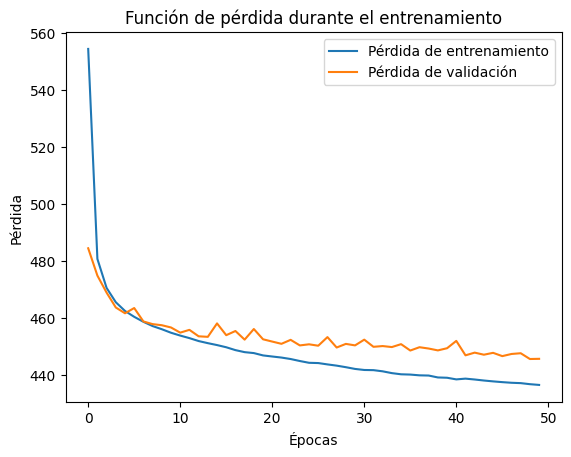

In [15]:
import matplotlib.pyplot as plt    # librería para gráficos
plt.plot(history.history['loss'], label='Pérdida de entrenamiento') # dibuja error sobre datos de entrenamiento
plt.plot(history.history['val_loss'], label='Pérdida de validación')# dibuja error sobre datos de validación
plt.xlabel('Épocas')  # etiqueta eje horizontal
plt.ylabel('Pérdida') # etiqueta eje vertical
plt.legend()# muestra leyendas
plt.title('Función de pérdida durante el entrenamiento') # título del gráfico
plt.show() # presenta la figura

In [16]:
loss, mae = model.evaluate(X_test, y_test)  # calcula pérdida y error absoluto medio sobre prueba
print(f"MAE en el conjunto test: {mae}")# muestra popularidad

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 445.3679 - mae: 17.1851
MAE en el conjunto test: 17.0960750579834


In [20]:
import pandas as pd  # librería tabular
predictions = model.predict(X_test)  # predice popularidad para cada canción de test
comparison = pd.DataFrame({'Actual': y_test,  # valor real
                           'Predicted': predictions.flatten()})  # valor predicho (aplanado a 1D)
print(comparison.head())  # muestra las 5 primeras filas

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 749us/step
   Actual  Predicted
0      50  38.250572
1      11   8.987399
2       0  33.147408
3       0  27.641296
4      57  39.063118


In [21]:
nombre_cancion = "Beso"     # cancion a buscar
canciones_df = df[df['track_name'].str.contains(nombre_cancion, case=False, na=False)]  # filtra filas cuyo título contenga "Beso", sin distinguir mayúsculas
print("Canciones encontradas:")
canciones_df[['track_name', 'artists', 'album_name']].head()  # muestra primeras coincidencias

Canciones encontradas:


,track_name,artists,album_name
1655,Un Beso de Desayuno,Calle 13,Residente o Visitante
17425,Beso Con Baba,Meth Math;Dinamarca,m♡rtal
21293,Son Tus Besos,Cestar,El Verdadero Amor
23145,El Beso (feat. Mathieu Ruz),Dombresky;Crusy,Toolroom Amsterdam 2022
23927,El Beso (feat. Mathieu Ruz),Dombresky;Crusy,El Beso (feat. Mathieu Ruz)


In [23]:
i = 0          # primer resultado de la búsqueda
cancion = canciones_df.iloc[i] # extrae la fila completa
X_input = cancion[features].values.reshape(1, -1) # selecciona solo las 12 características y forma (1 fila, 12 columnas)
X_input = scaler.transform(X_input) # escala los valores con el mismo ajuste usado en entrenamiento
prediccion = model.predict(X_input)[0][0] # predice popularidad (valor único)
print(f"Canción: {cancion['track_name']} - {cancion['artists']}")
print(f"Popularidad real: {cancion['popularity']}")
print(f"Predicción: {prediccion:.2f}") # muestra la predicción con 2 decimales

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Canción: Un Beso de Desayuno - Calle 13
Popularidad real: 20
Predicción: 38.56


In [24]:
from sklearn.metrics import r2_score, mean_squared_error  # importa las funciones de medida
r2 = r2_score(y_test, predictions)  # calcula coeficiente de determinación: 1 es predicción, 0 es igual que usar la media
print(f'R²: {r2:.3f}') # muestra el valor con 3 decimales
mse = mean_squared_error(y_test, predictions)  # error cuadrático medio: suma de los errores al cuadrado dividida por n
print(f'MSE: {mse:.3f}') # mientras más cercano a 0, mejor la precisión del modelo

R²: 0.106
MSE: 441.014
